In [18]:
import math

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# OUR LIBRARIES / FUNCTIONS
from ImageLoader import load_image, plot_loaded_images
from StarDetector import get_hough_circles, plot_detected_stars, get_stars_data

# GLOBAL VARIABLES
# im1_path = r'Boaz stars 1.png'
# im2_path = r'Boaz stars 2.png'
# im1_path = r'Stars/IMG_3046.HEIC'
# im2_path = r'Stars/IMG_3047.HEIC'
# im1_path = r'Stars/IMG_3060.HEIC'
# im2_path = r'Stars/IMG_3061.HEIC'

im1_path = "Ex1_test_101/fr1.jpg"
im2_path = "Ex1_test_101/fr2.jpg"

MY_KEYPOINTS = True

In [19]:
im1 = load_image(im1_path)
im2 = load_image(im2_path)

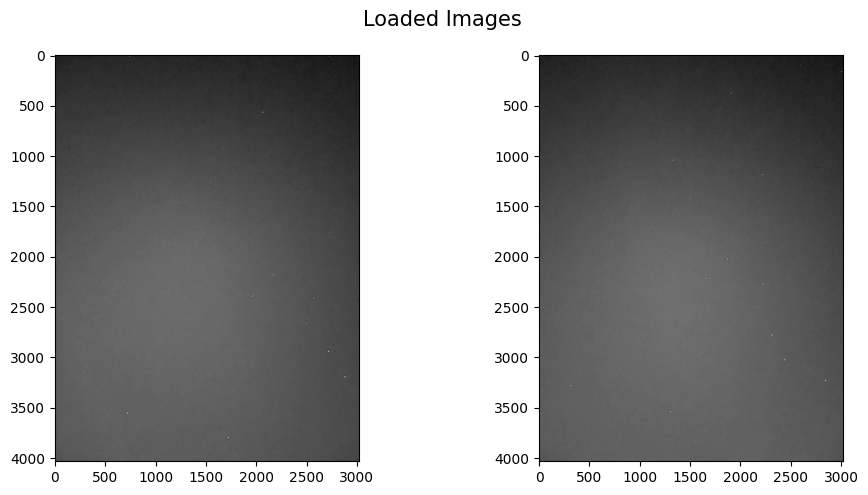

In [20]:
plot_loaded_images(im1, im2)
plt.show()

In [21]:
im1_circles = get_hough_circles(im1)
im2_circles = get_hough_circles(im2)

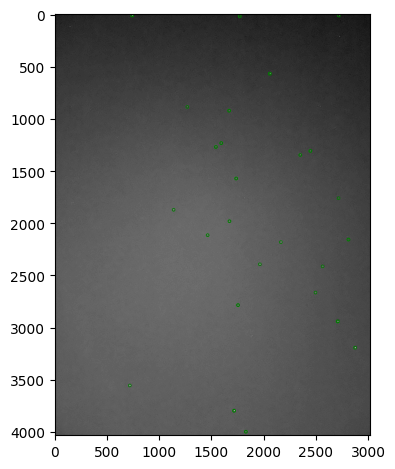

In [22]:
plot_detected_stars(im1, im1_circles)

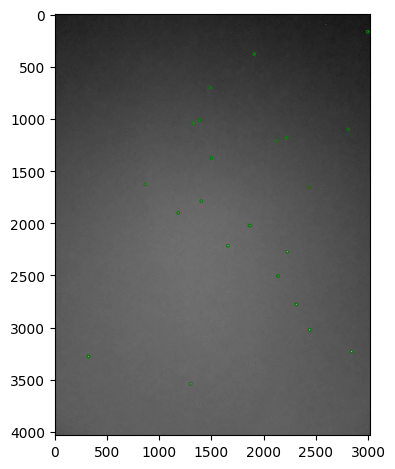

In [23]:
plot_detected_stars(im2, im2_circles)

In [24]:
im1_data = get_stars_data(im1, as_pandas=False)
im2_data = get_stars_data(im2, as_pandas=False)

In [25]:
im1_data

array([[2709, 2940,    5,  249],
       [1716, 3796,    5,  251],
       [ 717, 3554,    3,  253],
       [ 740,    8,    5,  251],
       [2875, 3192,    4,  248],
       [2720,    9,    3,  254],
       [1963, 2393,    3,  250],
       [2447, 1307,    4,  118],
       [2164, 2181,    3,  243],
       [1736, 1571,    4,  244],
       [2564, 2413,    3,  249],
       [1771,   16,    4,   55],
       [1463, 2114,    3,  244],
       [2717, 1760,    3,  220],
       [2059,  567,    5,  135],
       [1542, 1269,    4,  241],
       [1593, 1232,    4,   79],
       [1669,  921,    4,   59],
       [1754, 2784,    4,  104],
       [1829, 3997,    4,  148],
       [2350, 1346,    4,  247],
       [2496, 2664,    3,  247],
       [1672, 1980,    4,   98],
       [1137, 1871,    3,  241],
       [1268,  885,    3,  203],
       [2812, 2156,    4,   62]], dtype=uint32)

In [26]:
im2_data

array([[2310, 2777,    5,  251],
       [2438, 3020,    4,  254],
       [1656, 2216,    4,  252],
       [2224, 2274,    3,  251],
       [2840, 3230,    4,  255],
       [1909,  380,    4,  255],
       [ 319, 3276,    5,  124],
       [1866, 2022,    5,  224],
       [1301, 3540,    3,  249],
       [1324, 1042,    4,  220],
       [1498, 1373,    5,   80],
       [1182, 1900,    4,   95],
       [2810, 1101,    4,  115],
       [2429, 1655,    4,  223],
       [1487,  700,    3,  232],
       [2218, 1181,    5,   62],
       [2997,  165,    5,  108],
       [1402, 1787,    3,  189],
       [ 864, 1626,    3,  252],
       [1383, 1011,    5,   68],
       [2137, 2504,    5,  115],
       [2121, 1211,    3,  115]], dtype=uint32)

# Matching Algorithm

# Get keypoints

In [27]:
if MY_KEYPOINTS is True:
    keypoints1 = []
    for pt in im1_data:
        x, y, r, b = pt.astype(np.float32)
        diameter = 2 * r
        keypoints1.append(cv2.KeyPoint(x, y, diameter))

    keypoints2 = []
    for pt in im2_data:
        x, y, r, b = pt.astype(np.float32)
        diameter = 2 * r
        keypoints2.append(cv2.KeyPoint(x, y, diameter))

else:  # MY_KEYPOINTS is False
    # Setup SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()
    # # Change thresholds
    params.minThreshold = 60
    params.maxThreshold = 255

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 30
    params.maxArea = 600

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.15

    params.filterByInertia = False
    params.filterByConvexity = False

    params.blobColor = 255
    params.minRepeatability = 2
    # Set up the detector with default parameters.

    detector = cv2.SimpleBlobDetector_create(params)

    keypoints1 = detector.detect(im1)
    keypoints2 = detector.detect(im2)

    print(len(keypoints1))
    print(len(keypoints2))

    im1_with_keypoints = cv2.drawKeypoints(im1, keypoints1, np.array([]),
                                           (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # Display the result using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(im1_with_keypoints)
    plt.axis('off')
    plt.show()

    im2_with_keypoints = cv2.drawKeypoints(im2, keypoints2, np.array([]),
                                           (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # Display the result using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(im2_with_keypoints)
    plt.axis('off')
    plt.show()

# x, y = keypoints1[0].pt
# x = int(x)
# y = int(y)
# im1[y, x]

# Get keypoint descriptors

In [28]:
descriptor_extractor = cv2.ORB_create()
# Compute the descriptors for the keypoints (the returned keypoints remain the same!)
keypoints1, descriptors1 = descriptor_extractor.compute(im1, keypoints1)
keypoints2, descriptors2 = descriptor_extractor.compute(im2, keypoints2)

# Use the descriptors to match the keypoints of the 2 images

In [29]:
# Create a feature matching object.
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [30]:
# Match the keypoints between the two images.
matches = matcher.match(descriptors1, descriptors2)
# sort the matches based on distance
matches = sorted(matches, key=lambda val: val.distance)
print(f"Found {len(matches)} matches")

Found 9 matches


In [31]:
result = cv2.drawMatches(im1, keypoints1,
                         im2, keypoints2,
                         matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

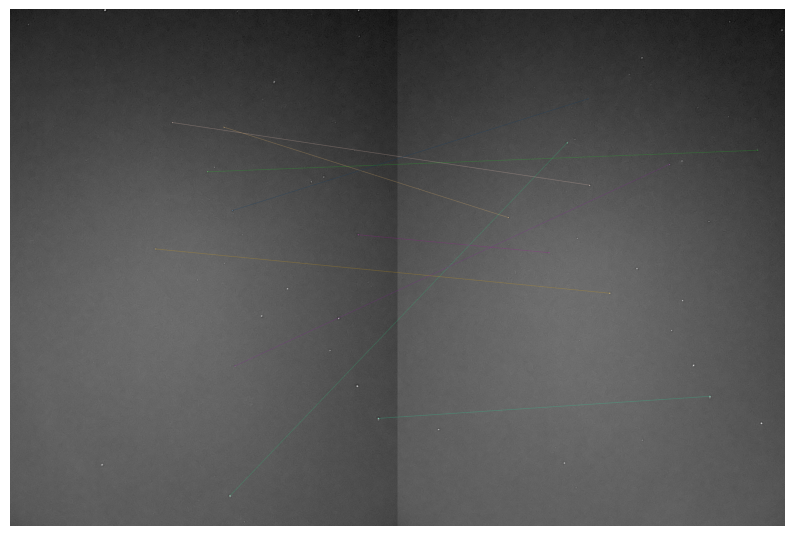

In [32]:
# Display the result using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(result)
ax.axis('off')
plt.show()

# Find transformation from Image1 to Image2

In [33]:
# # extract the (x, y) coordinates of the matched keypoints in both images
# points1 = np.zeros((len(matches), 2), dtype=np.float32)
# points2 = np.zeros((len(matches), 2), dtype=np.float32)
#
# for i, match in enumerate(matches):
#     points1[i, :] = keypoints1[match.queryIdx].pt
#     points2[i, :] = keypoints2[match.trainIdx].pt

# extract the (x, y) coordinates of the matched keypoints in both images
points1 = np.zeros((len(matches), 3), dtype=np.float32)
points2 = np.zeros((len(matches), 3), dtype=np.float32)

for i, match in enumerate(matches):
    kp1, kp2 = keypoints1[match.queryIdx], keypoints2[match.trainIdx]
    points1[i, :2], points1[i, 2] = kp1.pt, kp1.size / 2
    points2[i, :2], points2[i, 2] = kp2.pt, kp2.size / 2

In [34]:
# estimate the homography matrix using RANSAC
H, _ = cv2.findHomography(points1[:, :2], points2[:, :2], cv2.RANSAC)

In [35]:
H

array([[-1.26212868e+00,  6.09885017e-01,  1.75285767e+03],
       [-6.23429023e-01,  1.97366228e-01,  1.25030306e+03],
       [-5.70657590e-04,  2.09824244e-04,  1.00000000e+00]])

In [36]:
# transform points from the first image to the second image
src2dst = []
for pt in points1[:, :2]:
    x, y = pt
    new_coords = H @ np.array([x, y, 1])
    new_coords /= new_coords[-1]  # divide by last coordinate to normalize
    if sum(new_coords[:-1] < 0) == 0:  # check that both x, y coordinates are positive!
        src2dst.append(new_coords[:-1])
src2dst = np.array(src2dst, dtype=np.float32)

In [37]:
src2dst

array([[2327.5393 , 1137.6046 ],
       [1961.5798 , 1224.5304 ],
       [2438.     , 3020.     ],
       [1502.9248 , 1396.3633 ],
       [2121.     , 1211.     ],
       [3327.7864 ,  530.88556],
       [1498.     , 1373.     ],
       [ 864.     , 1626.     ],
       [1533.8469 , 1410.4178 ]], dtype=float32)

In [38]:
points2[:, :2]

array([[1324., 1042.],
       [1656., 2216.],
       [2438., 3020.],
       [2810., 1101.],
       [2121., 1211.],
       [1182., 1900.],
       [1498., 1373.],
       [ 864., 1626.],
       [1487.,  700.]], dtype=float32)

In [39]:
# transform points from the first image to the second image
matched_points = []
dist_thresh = 10  # Set a distance threshold for matching points
for i, (p1, p2) in enumerate(zip(points1[:, :2], points2[:, :2])):
    x, y = p1
    new_coords = H @ np.array([x, y, 1])
    new_coords /= new_coords[-1]  # divide by last coordinate to normalize
    new_coords = new_coords[:-1]
    if sum(new_coords < 0) == 0:  # check that both x, y coordinates are positive!
        curr_dist = np.linalg.norm(new_coords - p2)
        if curr_dist < dist_thresh:
            matched_points.append(i)

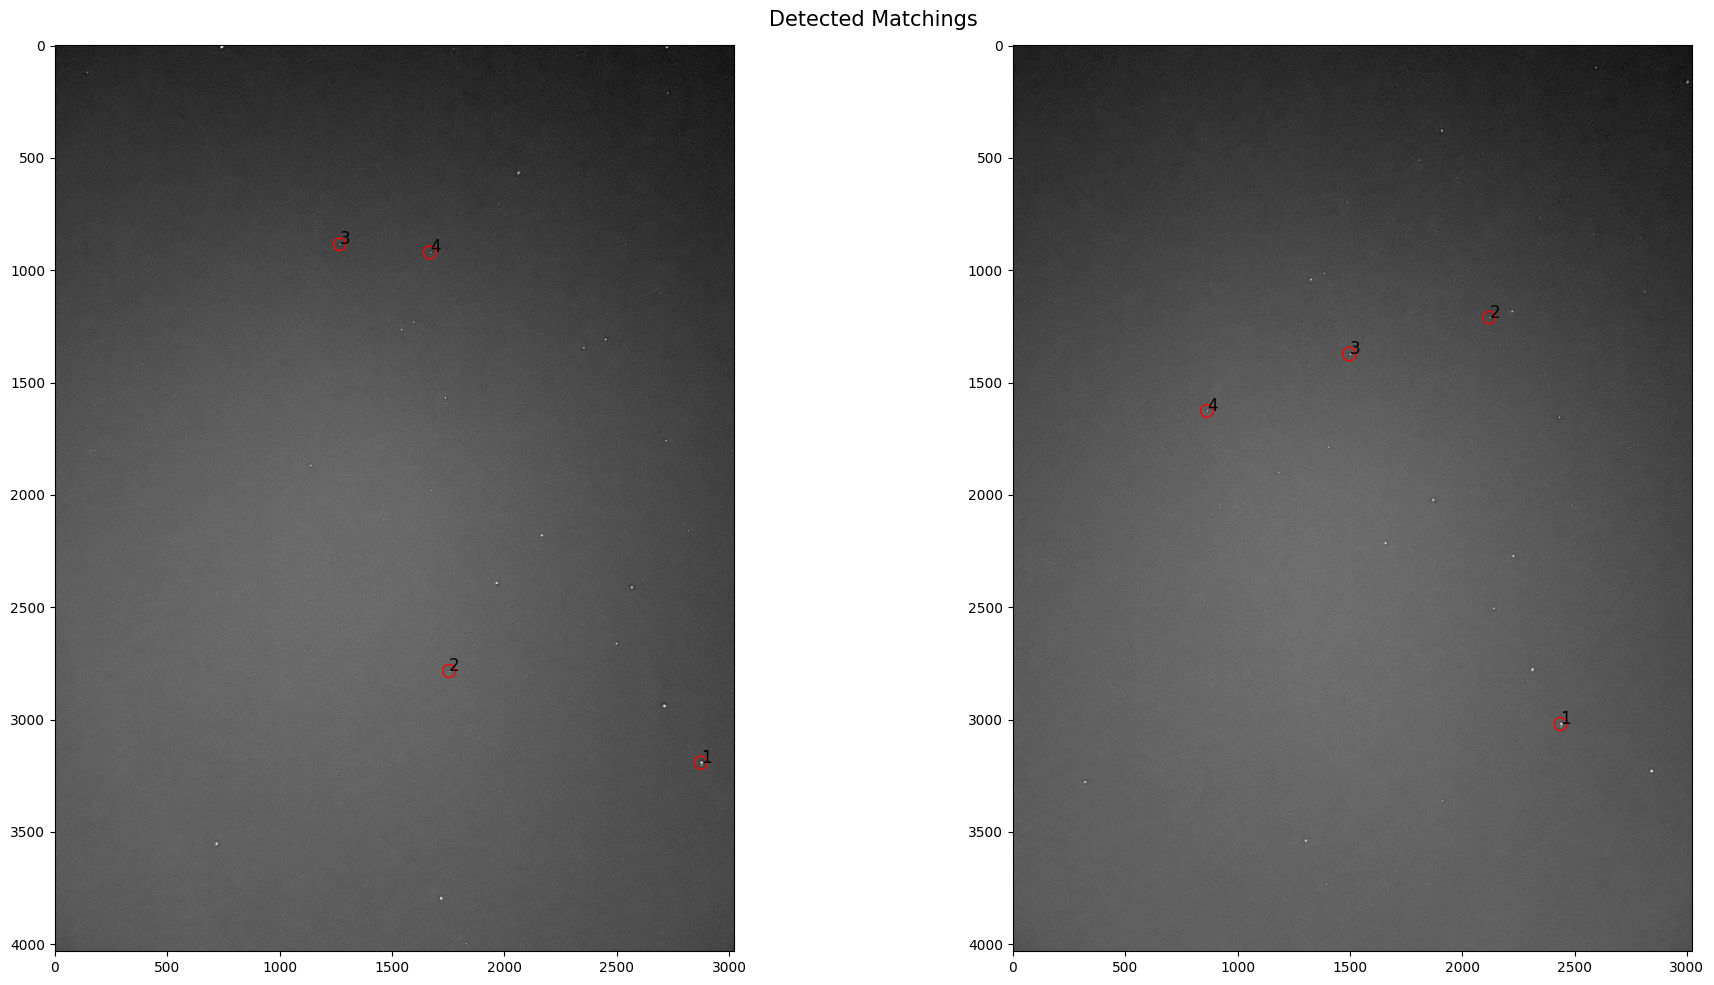

In [40]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
fig.suptitle("Detected Matchings", size=15)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap='gray')

for num, idx in enumerate(matched_points, 1):
    x1, y1, r1 = points1[idx]
    ax[0].text(x1, y1, f"{num}", fontsize=12, horizontalalignment='left', verticalalignment='baseline')
    ax[0].add_patch(plt.Circle((x1, y1), radius=r1 + 25, edgecolor='r', facecolor='none'))

    x2, y2, r2 = points2[idx]
    ax[1].text(x2, y2, f"{num}", fontsize=12, horizontalalignment='left', verticalalignment='baseline')
    ax[1].add_patch(plt.Circle((x2, y2), radius=r2 + 25, edgecolor='r', facecolor='none'))

plt.tight_layout()
plt.show()

In [41]:
# transformed_pts = []
# for kp1 in keypoints1:
#     p1 = kp1.pt
#     x, y = p1
#     new_coords = H @ np.array([x, y, 1])
#     new_coords /= new_coords[-1]  # divide by last coordinate to normalize
#     new_coords = new_coords[:-1]  # remove last index
#     if sum(new_coords < 0) == 0:  # check that both x, y coordinates are positive!
#         transformed_pts.append(new_coords)
# transformed_pts = np.array(transformed_pts, dtype=np.uint32)


In [42]:
# # iterate the transformed points and look for a match in the original image
# matched_points = []
# dist_thresh = 10  # Set a distance threshold for matching points
# for i, kp1 in enumerate(keypoints1):
#     p1 = kp1.pt
#     p1_transformed = calculate_transformation(H, p1)
#     if p1_transformed is not None:
#         for j, kp2 in enumerate(keypoints2):
#             p2 = kp2.pt
#             curr_dist = np.linalg.norm(p1_transformed - p2)
#             if curr_dist < dist_thresh:
#                 matched_points.append((i, j, curr_dist))
#
# matched_points = sorted(matched_points, key=lambda m: m[-1])
# matched_points